In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("darkgrid")
mpl.rcParams['figure.dpi'] = 150

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [16]:
df = pd.read_csv('data/train.csv')
df.head(5)

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [3]:
df.shape 

(15120, 56)

In [4]:
df__ = pd.read_csv('data/test.csv')

In [5]:
df__.shape

(565892, 55)

In [8]:
df.info() # no NaN values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [9]:
df.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

In [10]:
# Soil_Type1-40, Wilderness_Area1-4 - binary columns
# One tree can only belong to one soil type or one wilderness area
# So, Wilderness_Area1-4 and Soil-Type1-40 are one-hot-encoded columns

df.iloc[:, 11:15].sum(axis=1).nunique(), df.iloc[:, 15:-1].sum(axis=1).nunique() 

(1, 1)

In [17]:
df['Wilderness_Area_Type'] = (df.iloc[:, 11:15] == 1).idxmax(1)
df['Soil_Type'] = (df.iloc[:, 15:-1] == 1).idxmax(1)

In [18]:
df_ = (df
      .drop([i for i in df__.columns[10:55]], axis=1)
      .drop(['Id'], axis=1)
       )
df_

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  Cover_Type  \
0                221             232            148           5   
1                220             235            151           5   
2                234             238            135           2   
3                238             238            122           2   
4                220             234            150           5   
...              ...             ...            ...         ...   
15115            170             251            214           3   
15116            249             221             91           3   
15117            250             220             83           3   
15118            229             237            119           3   
15119            189             244            164           3   

      Wilderness_Area_Type    Soil_Type  
0         Wilderness_Area1  Soil_Type29  
1         Wilderness_Area1  Soil_Type29  
2         Wilderness_Area1  Soil_Type12  
3         Wilderness_Area1  Soil_Type30  
4         Wilderness_Area1  Soil_Type29  
...                    ...          ...  
15115     Wilderness_Area3   Soil_Type4  
15116     Wilderness_Area3   Soil_Type4  
15117     Wilderness_Area3   Soil_Type4  
15118     Wilderness_Area3   Soil_Type4  
15119     Wilderness_Area3   Soil_Type2  

[15120 rows x 12 columns]

In [19]:
df_['Wilderness_Area_Type'] = df['Wilderness_Area_Type'].apply(lambda x: int(x[-1]))
df_['Soil_Type'] = df['Soil_Type'].apply(lambda x: int(x[-1]) if (len(x)==10) else int(x[-2:]))

In [20]:
df_

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  Cover_Type  \
0                221             232            148           5   
1                220             235            151           5   
2                234             238            135           2   
3                238             238            122           2   
4                220             234            150           5   
...              ...             ...            ...         ...   
15115            170             251            214           3   
15116            249             221             91           3   
15117            250             220             83           3   
15118            229             237            119           3   
15119            189             244            164           3   

       Wilderness_Area_Type  Soil_Type  
0                         1         29  
1                         1         29  
2                         1         12  
3                         1         30  
4                         1         29  
...                     ...        ...  
15115                     3          4  
15116                     3          4  
15117                     3          4  
15118                     3          4  
15119                     3          2  

[15120 rows x 12 columns]

In [21]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Elevation                         15120 non-null  int64
 1   Aspect                            15120 non-null  int64
 2   Slope                             15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology  15120 non-null  int64
 4   Vertical_Distance_To_Hydrology    15120 non-null  int64
 5   Horizontal_Distance_To_Roadways   15120 non-null  int64
 6   Hillshade_9am                     15120 non-null  int64
 7   Hillshade_Noon                    15120 non-null  int64
 8   Hillshade_3pm                     15120 non-null  int64
 9   Cover_Type                        15120 non-null  int64
 10  Wilderness_Area_Type              15120 non-null  int64
 11  Soil_Type                         15120 non-null  int64
dtypes: int64(12)
memory usage: 1.4 M

In [370]:
# some basics 
# weird thing: negative number in Vertical_Distance_To_Hydrology, which is 
# Vertical distance to nearest surface water features
# the nearest surface water is below that data point or it is below the sea level

df_.describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points    Cover_Type  \
count   15120.000000                        15120.000000  15120.000000   
mean      135.091997                         1511.147288      4.000000   
std        45.895189                         1099.936493      2.000066   
min         0.000000                            0.000000      1.000000   
25%       106.000000                          730.000000      2.000000   
50%       138.000000                         1256.000000      4.000000   
75%       167.000000                         1988.250000      6.000000   
max       248.000000                         6993.000000      7.000000   

       Wilderness_Area_Type     Soil_Type  
count          15120.000000  15120.000000  
mean               2.800397     19.171362  
std                1.119832     12.626960  
min                1.000000      1.000000  
25%                2.000000     10.000000  
50%                3.000000     17.000000  
75%                4.000000     30.000000  
max                4.000000     40.000000

In [25]:
# we have 1139 rows with negative Vertical_Distance_To_Hydrology

df_[df_['Vertical_Distance_To_Hydrology']<0].shape

(1139, 12)

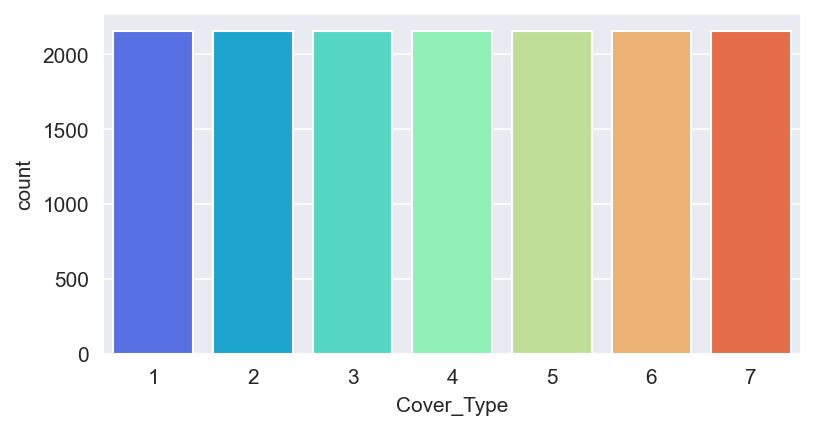

In [410]:
# our target variable

fig, ax = plt.subplots(figsize=(6, 3))
sns.countplot(data = df_, x="Cover_Type", palette='rainbow')
plt.show() # evenly distributed 
# almost equal number of cover types for each class

<AxesSubplot:xlabel='Cover_Type', ylabel='Count'>

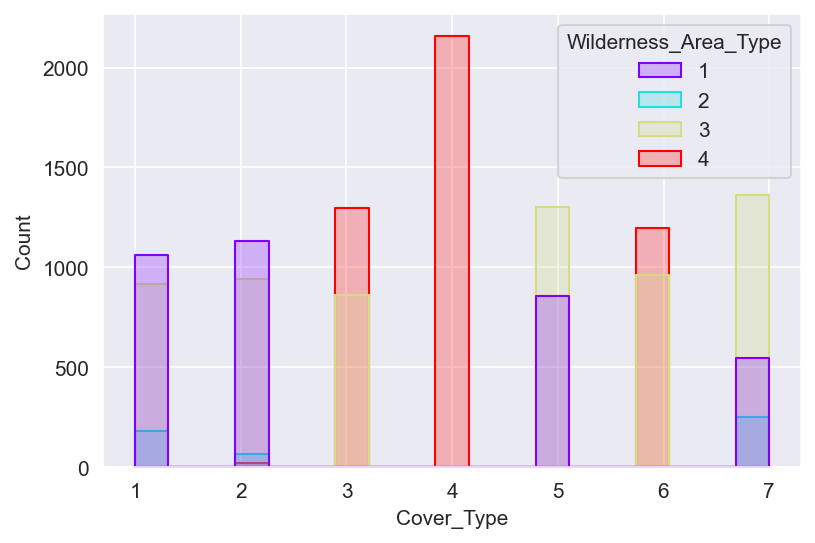

In [411]:
sns.histplot(data=df_, x='Cover_Type', hue='Wilderness_Area_Type', element='step', palette='rainbow')

# important feature to determine Cover_Type - for example Covet_Type 4 - only Wilderness_Area_Type4,
# Cover_Type1_2_and_7 has only - only Wilderness_Area1_3_2

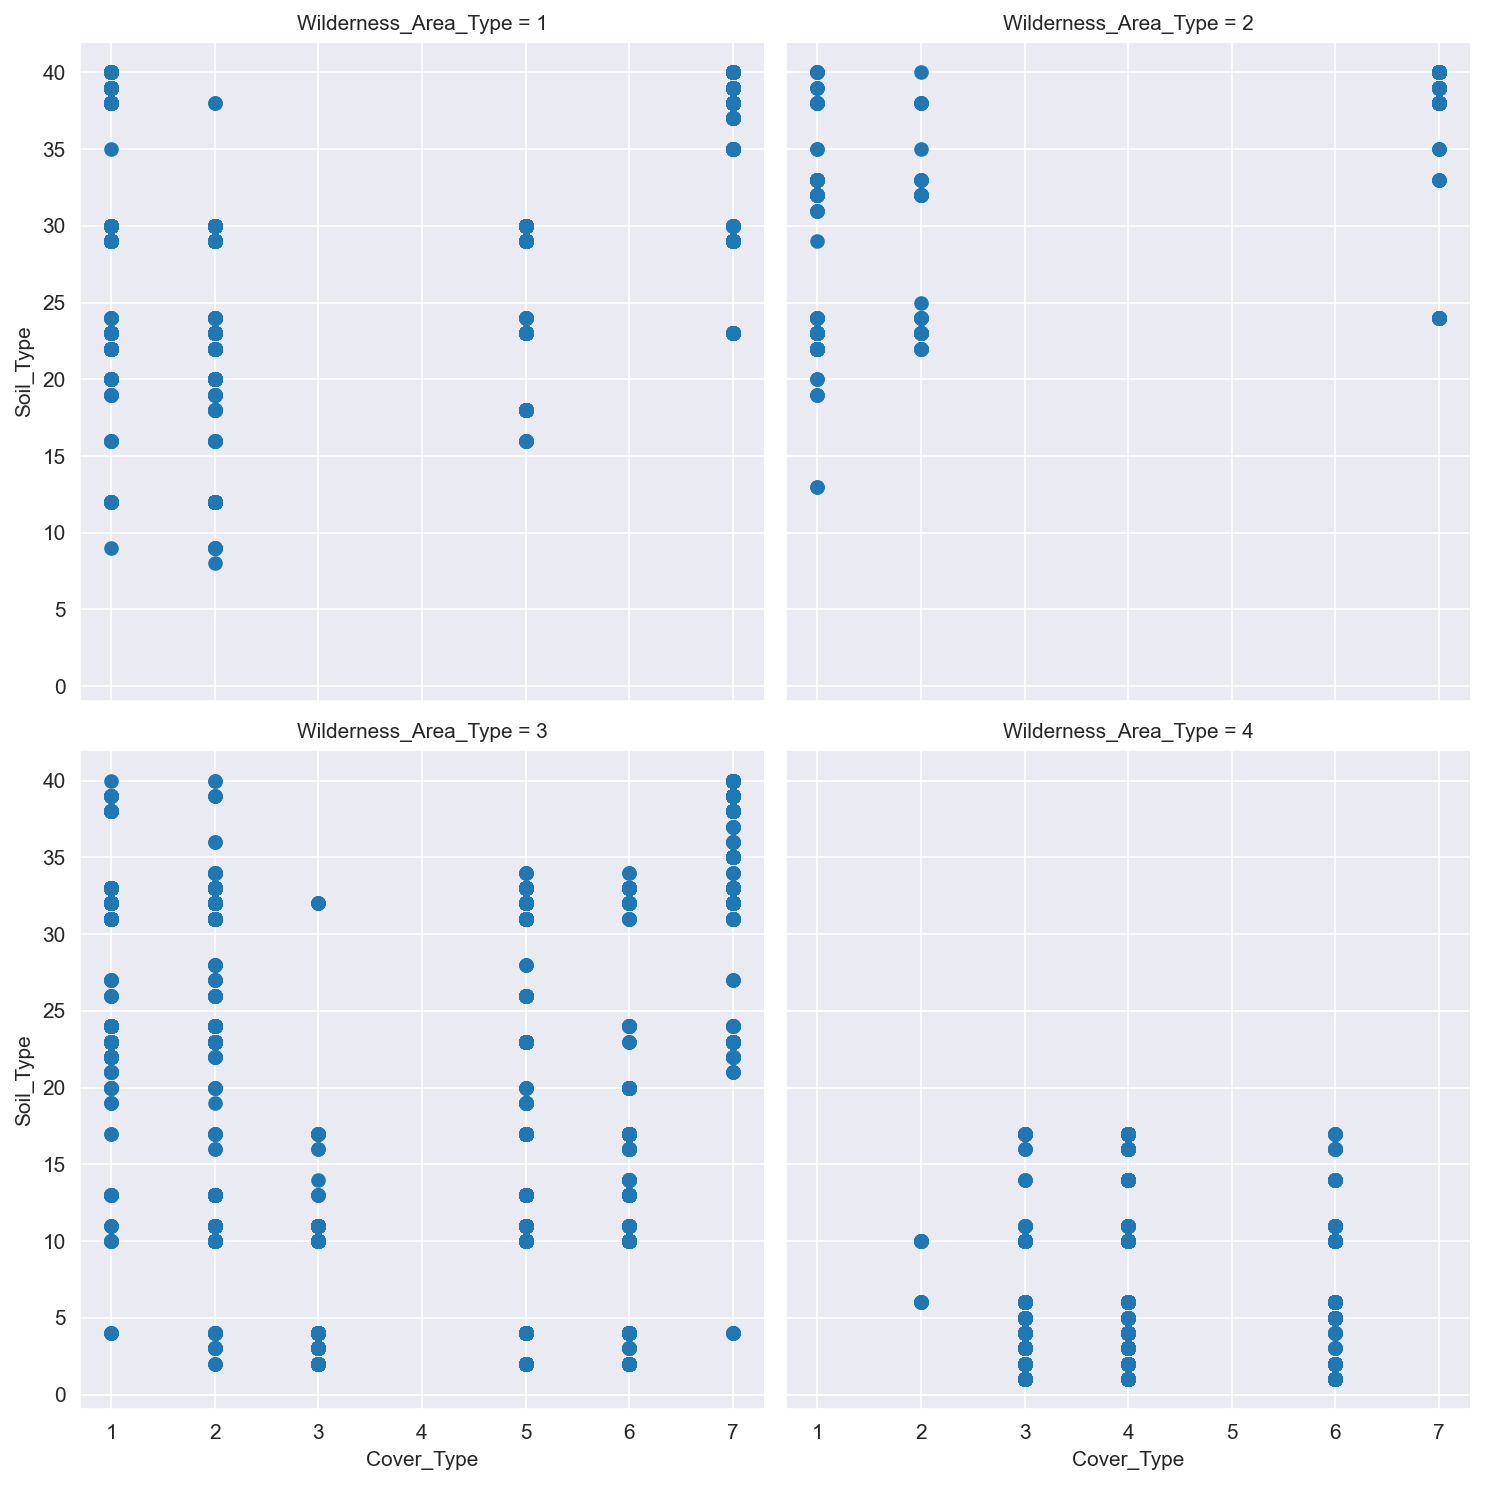

In [412]:
g = sns.FacetGrid(df_, col="Wilderness_Area_Type", 
                  col_wrap=2, height=5, col_order=[1, 2, 3, 4], palette='rainbow')
g = g.map(plt.scatter,"Cover_Type", "Soil_Type")

# Wilderness_Area3 is more diverse in terms od Soil_Type and Cover_Type
# The least diverse in terms of Cover_Type is Wilderness_Area_Type2

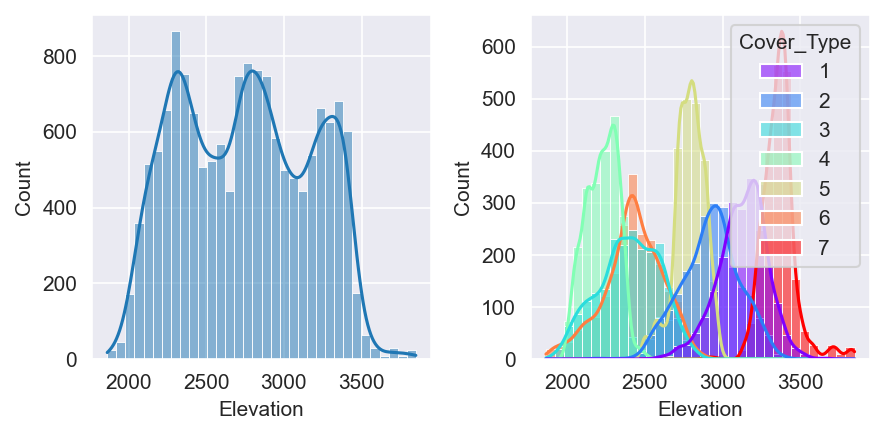

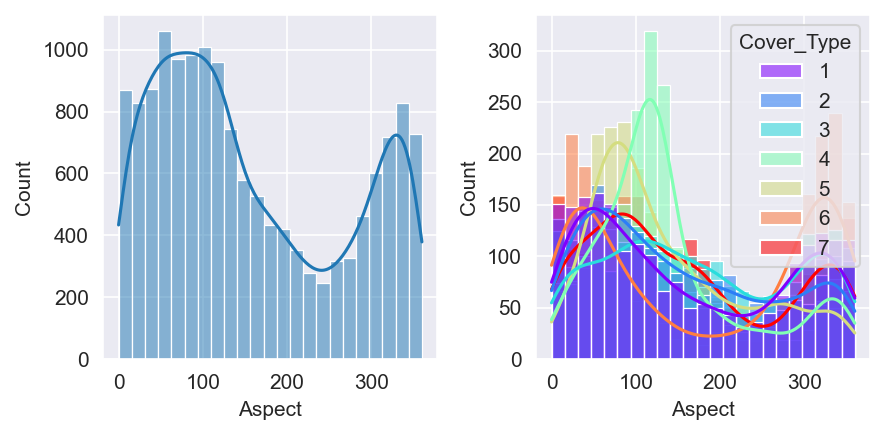

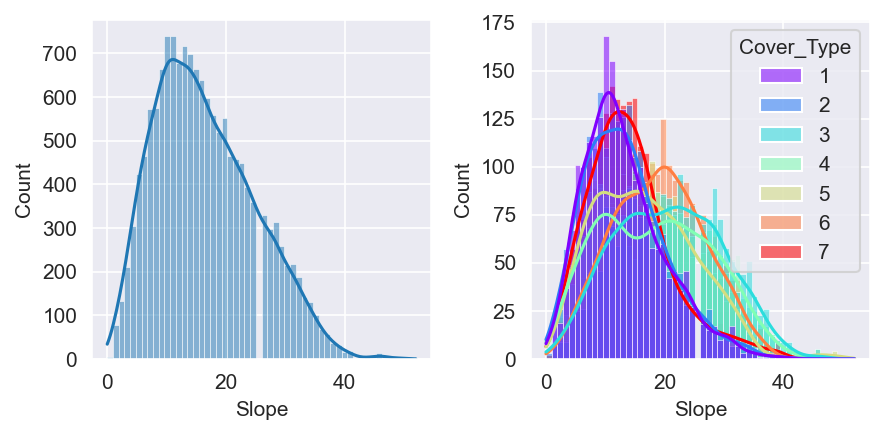

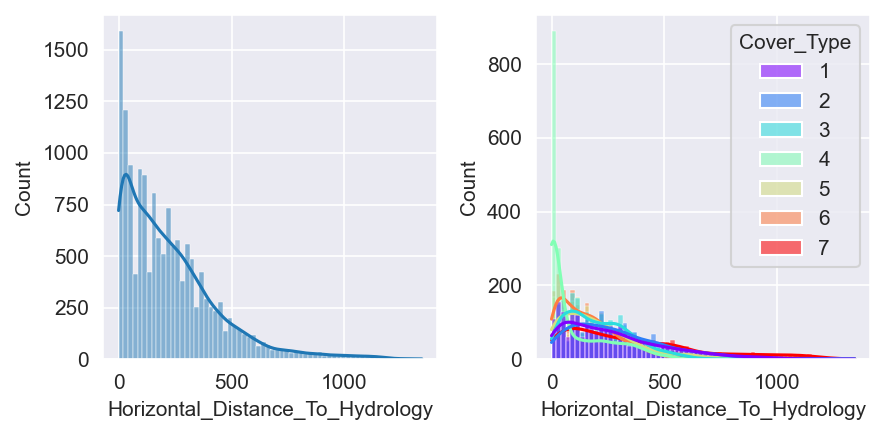

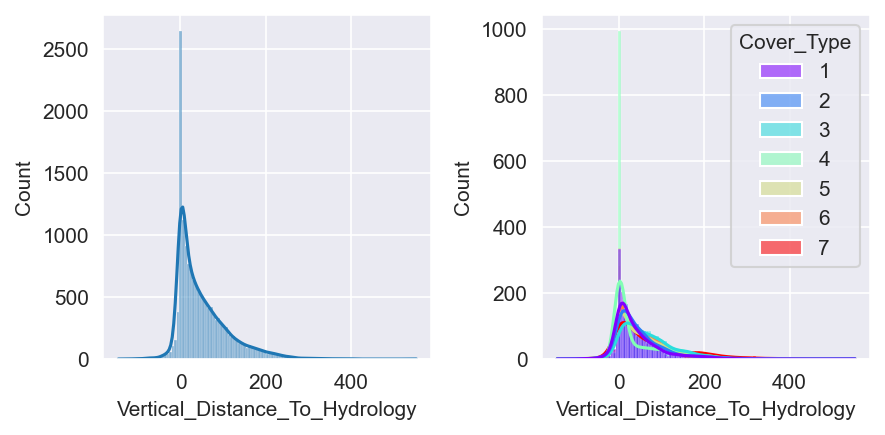

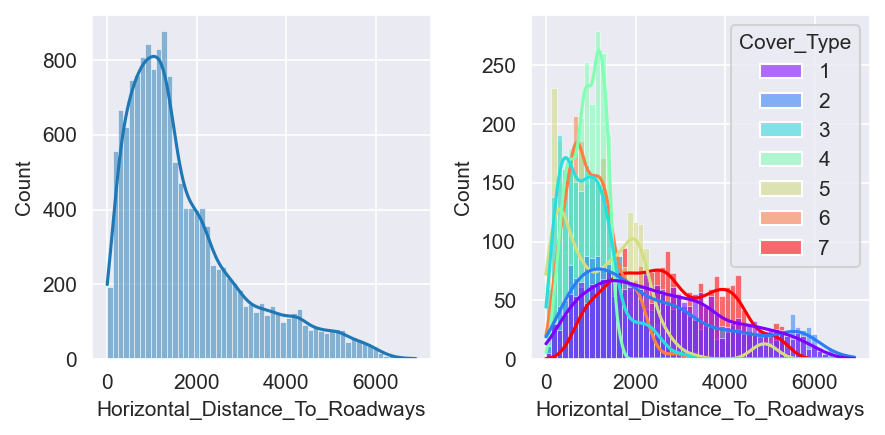

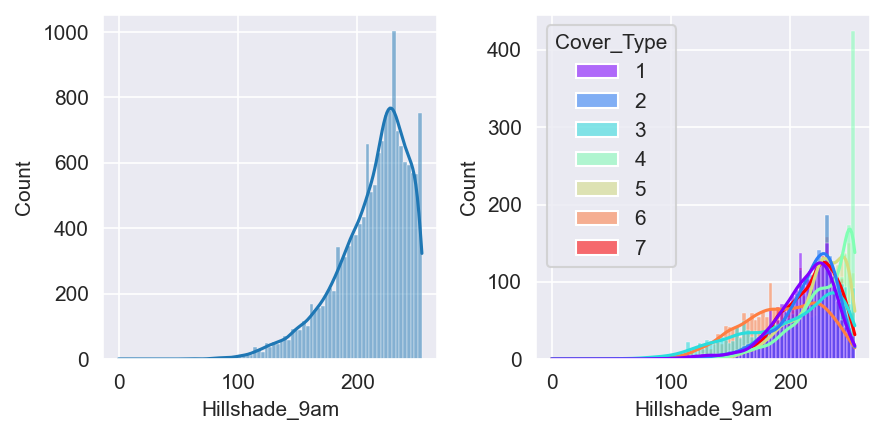

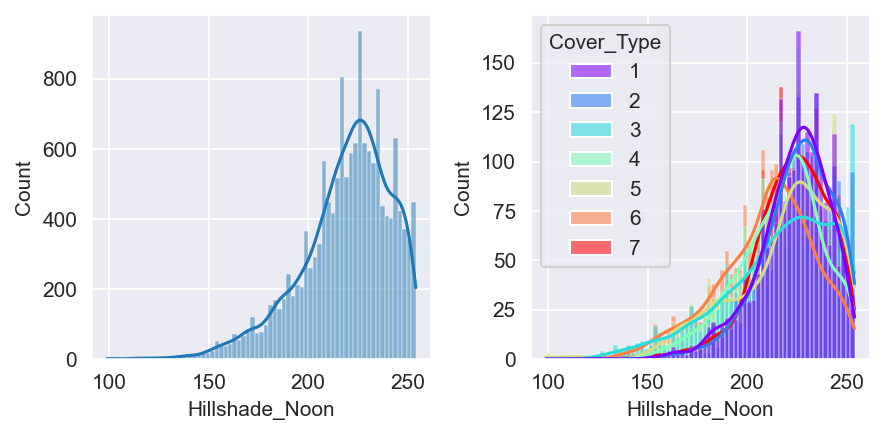

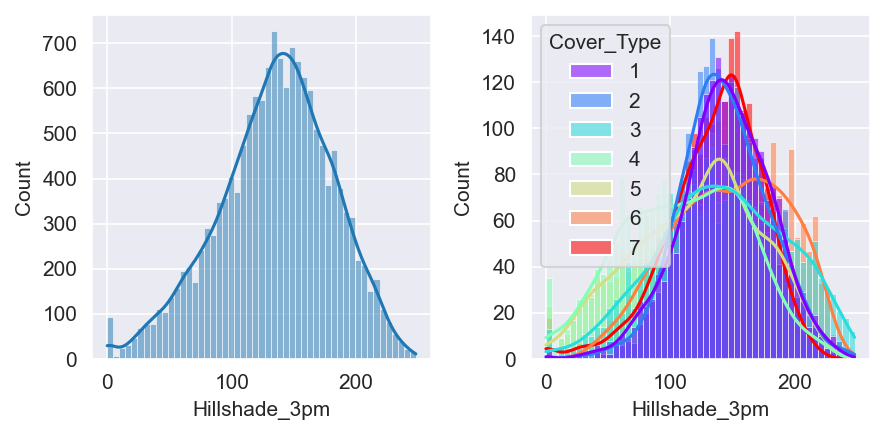

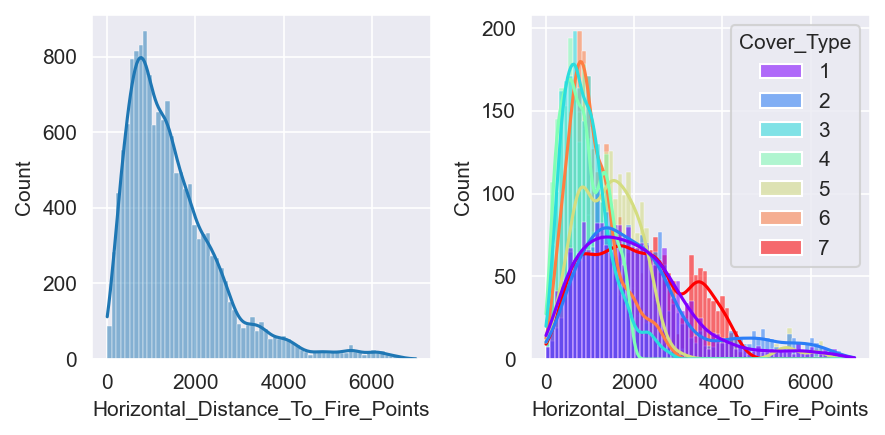

In [413]:
for column in ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
              "Horizontal_Distance_To_Fire_Points"]:
    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    sns.histplot(data=df_, x=column, kde=True, ax=ax[0], palette='rainbow')
    sns.histplot(data=df_, x=column, hue="Cover_Type", kde=True, alpha=0.55, ax=ax[1], palette='rainbow')
    plt.tight_layout()
    plt.show()

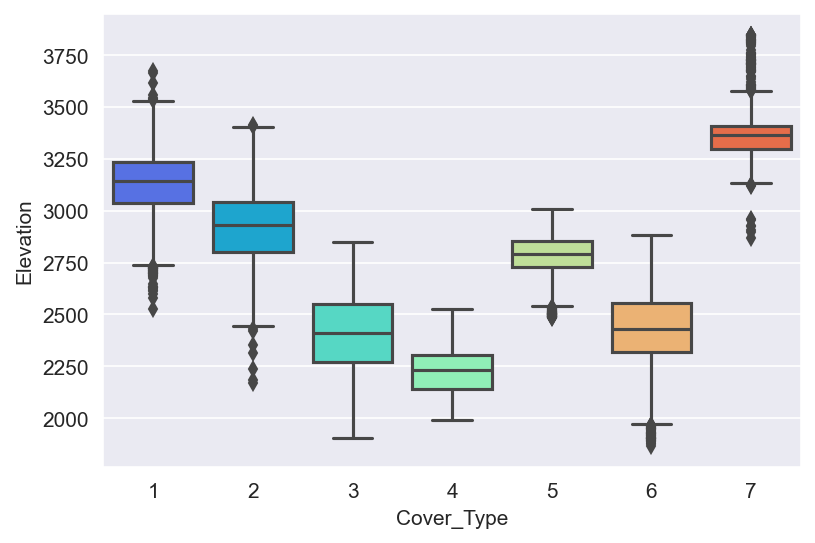

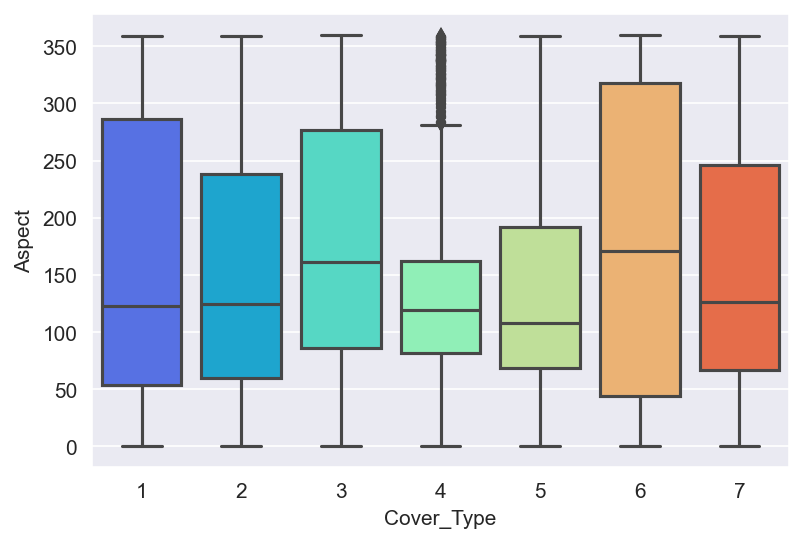

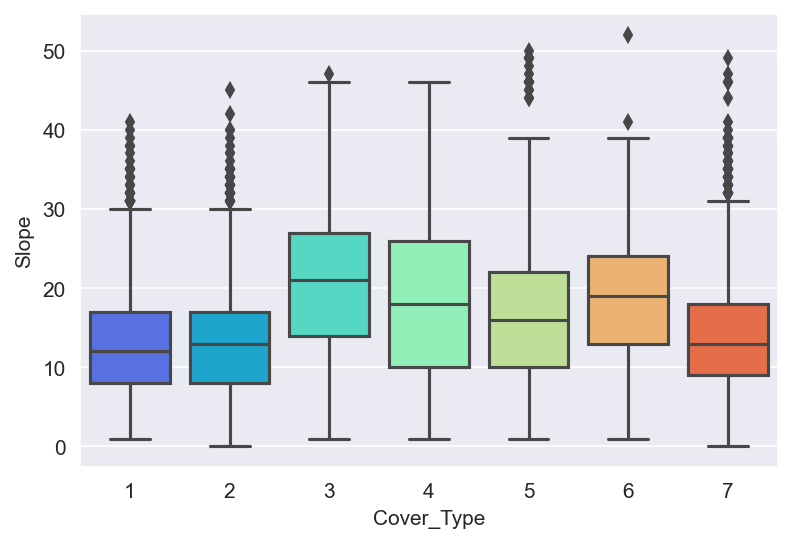

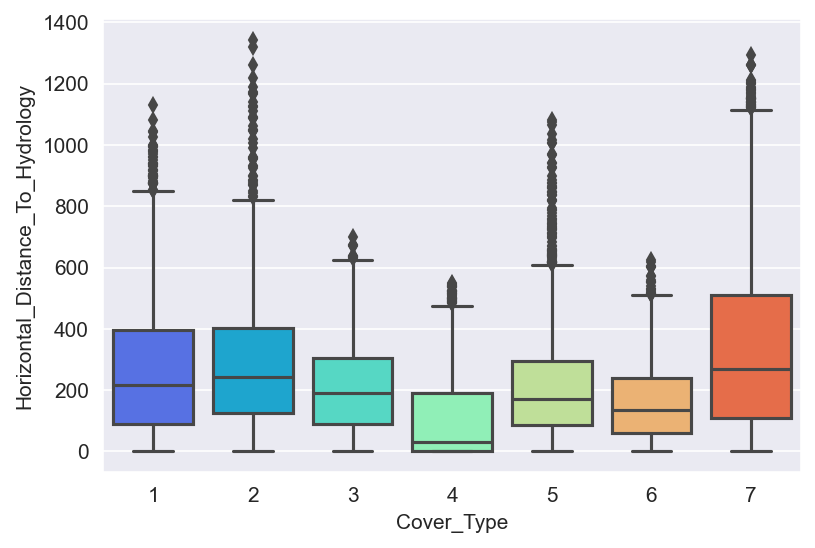

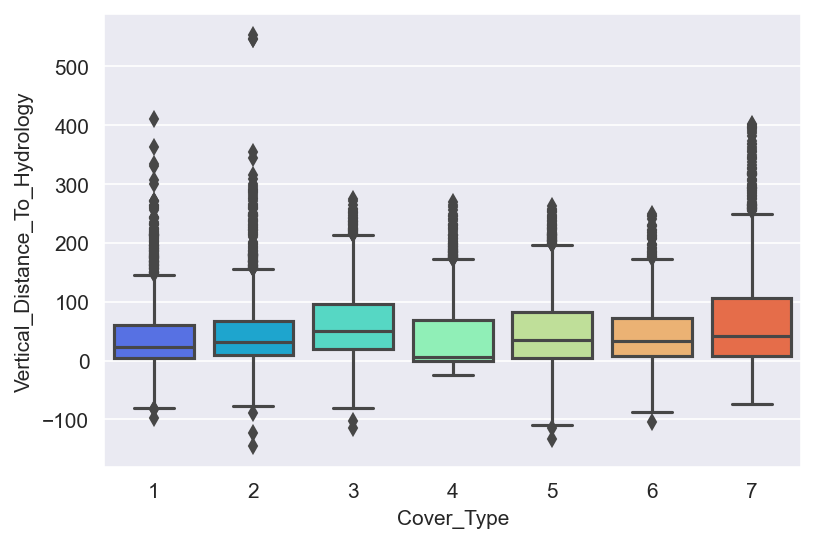

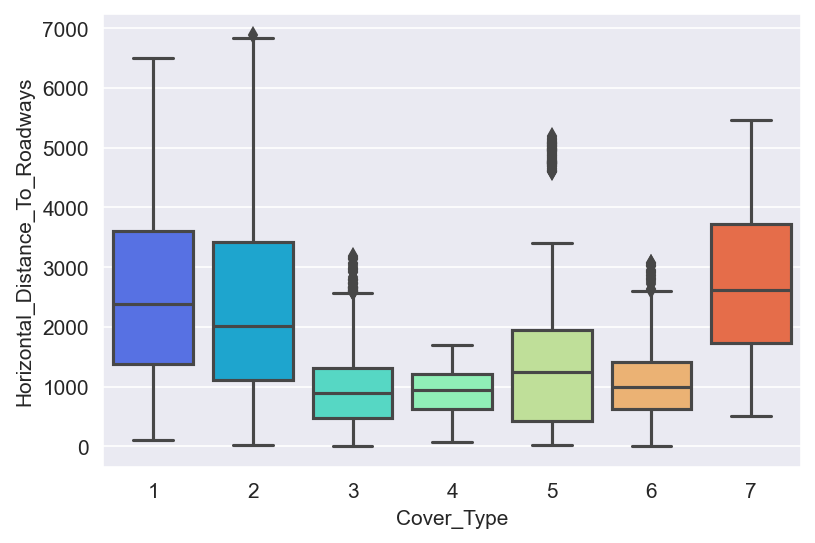

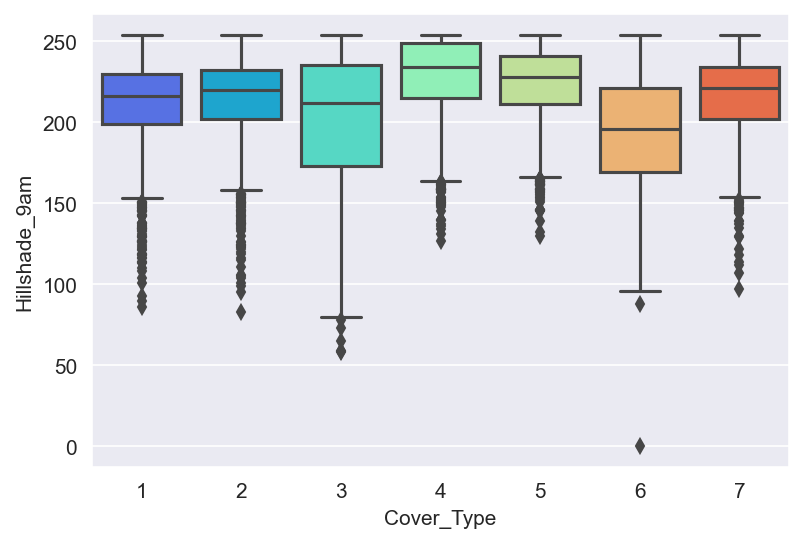

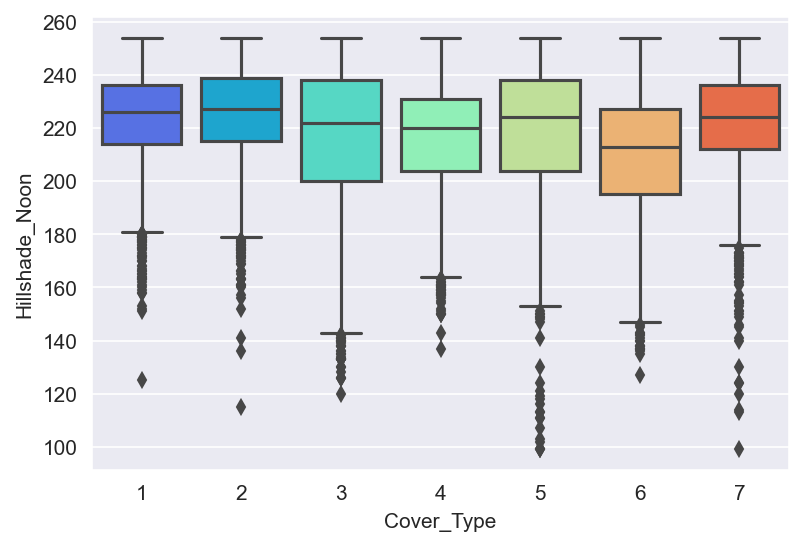

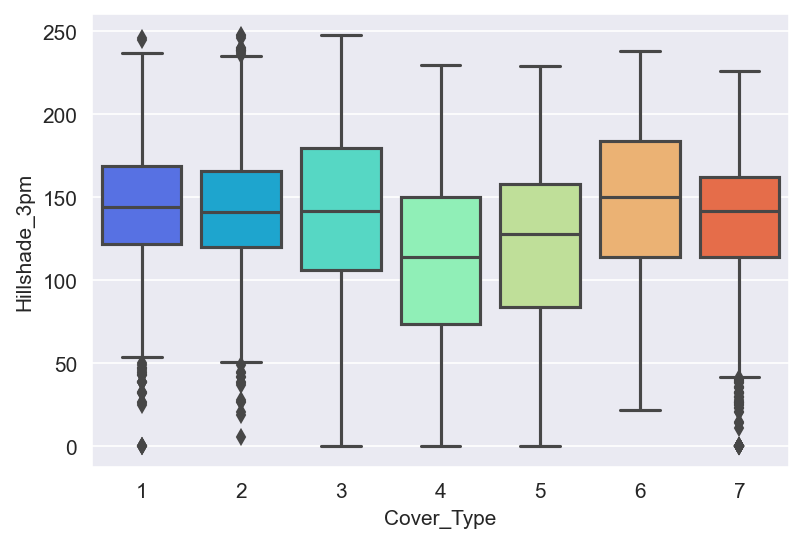

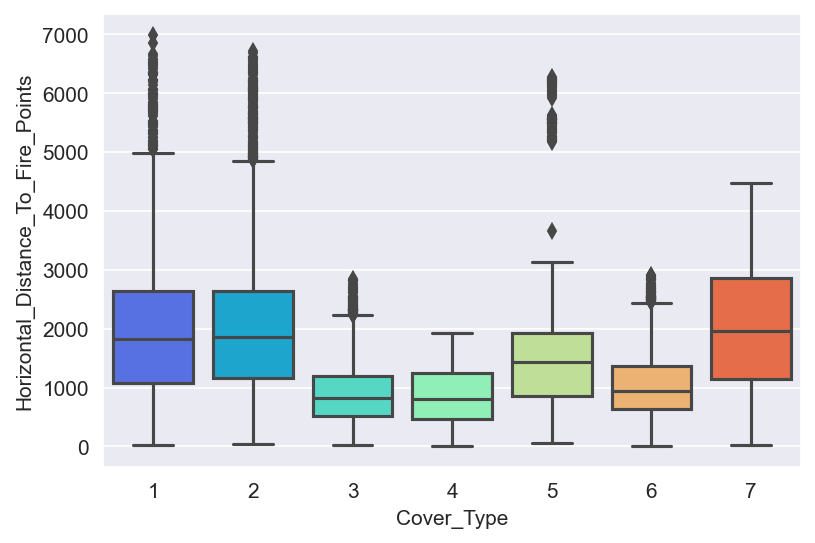

In [375]:
for column in ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
              "Horizontal_Distance_To_Fire_Points"]:
    sns.boxplot(y=df_[column], x=df_['Cover_Type'], palette='rainbow')
    plt.show()
    
# for each forest cover type there are entries in every variables
# we can see our negative values in Vertical_Distance_To_Hydrology

Text(0.5, 1.05, 'Pearson Correlation of Features')

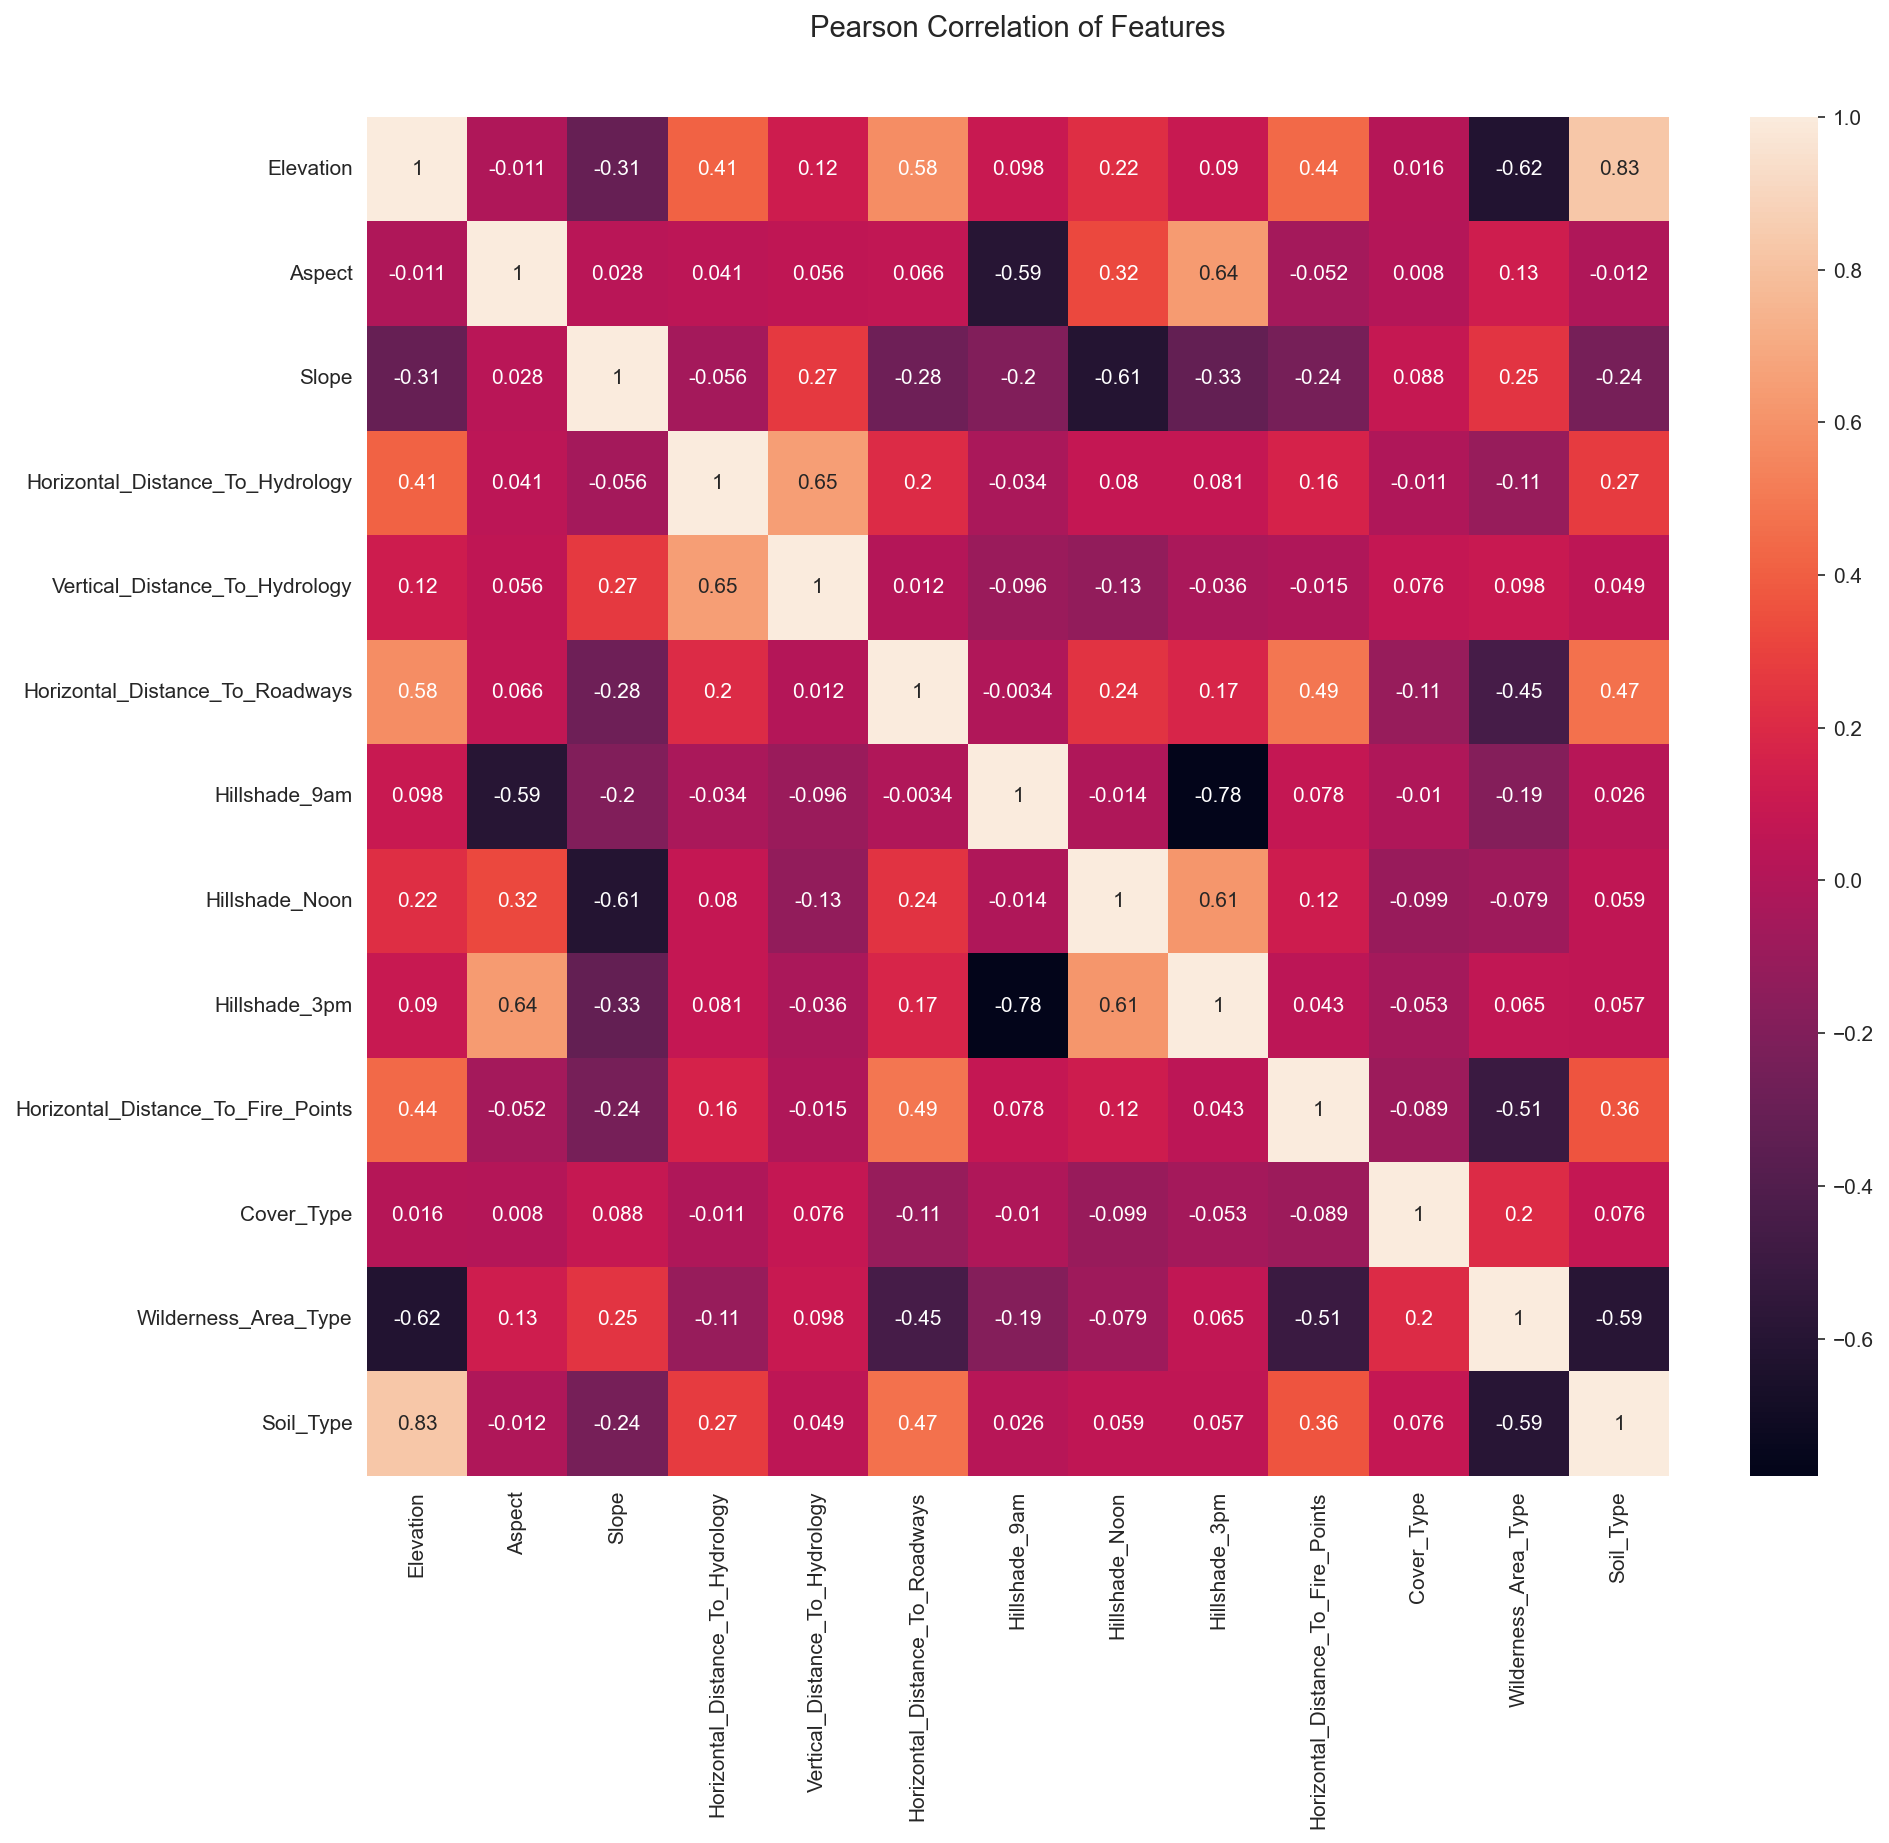

In [415]:
plt.figure(figsize=(14,12))
sns.heatmap(df_.corr(), annot=True)
plt.title('Pearson Correlation of Features', y=1.05, size=14)

Text(0.5, 1.05, 'Pearson Correlation of All Features')

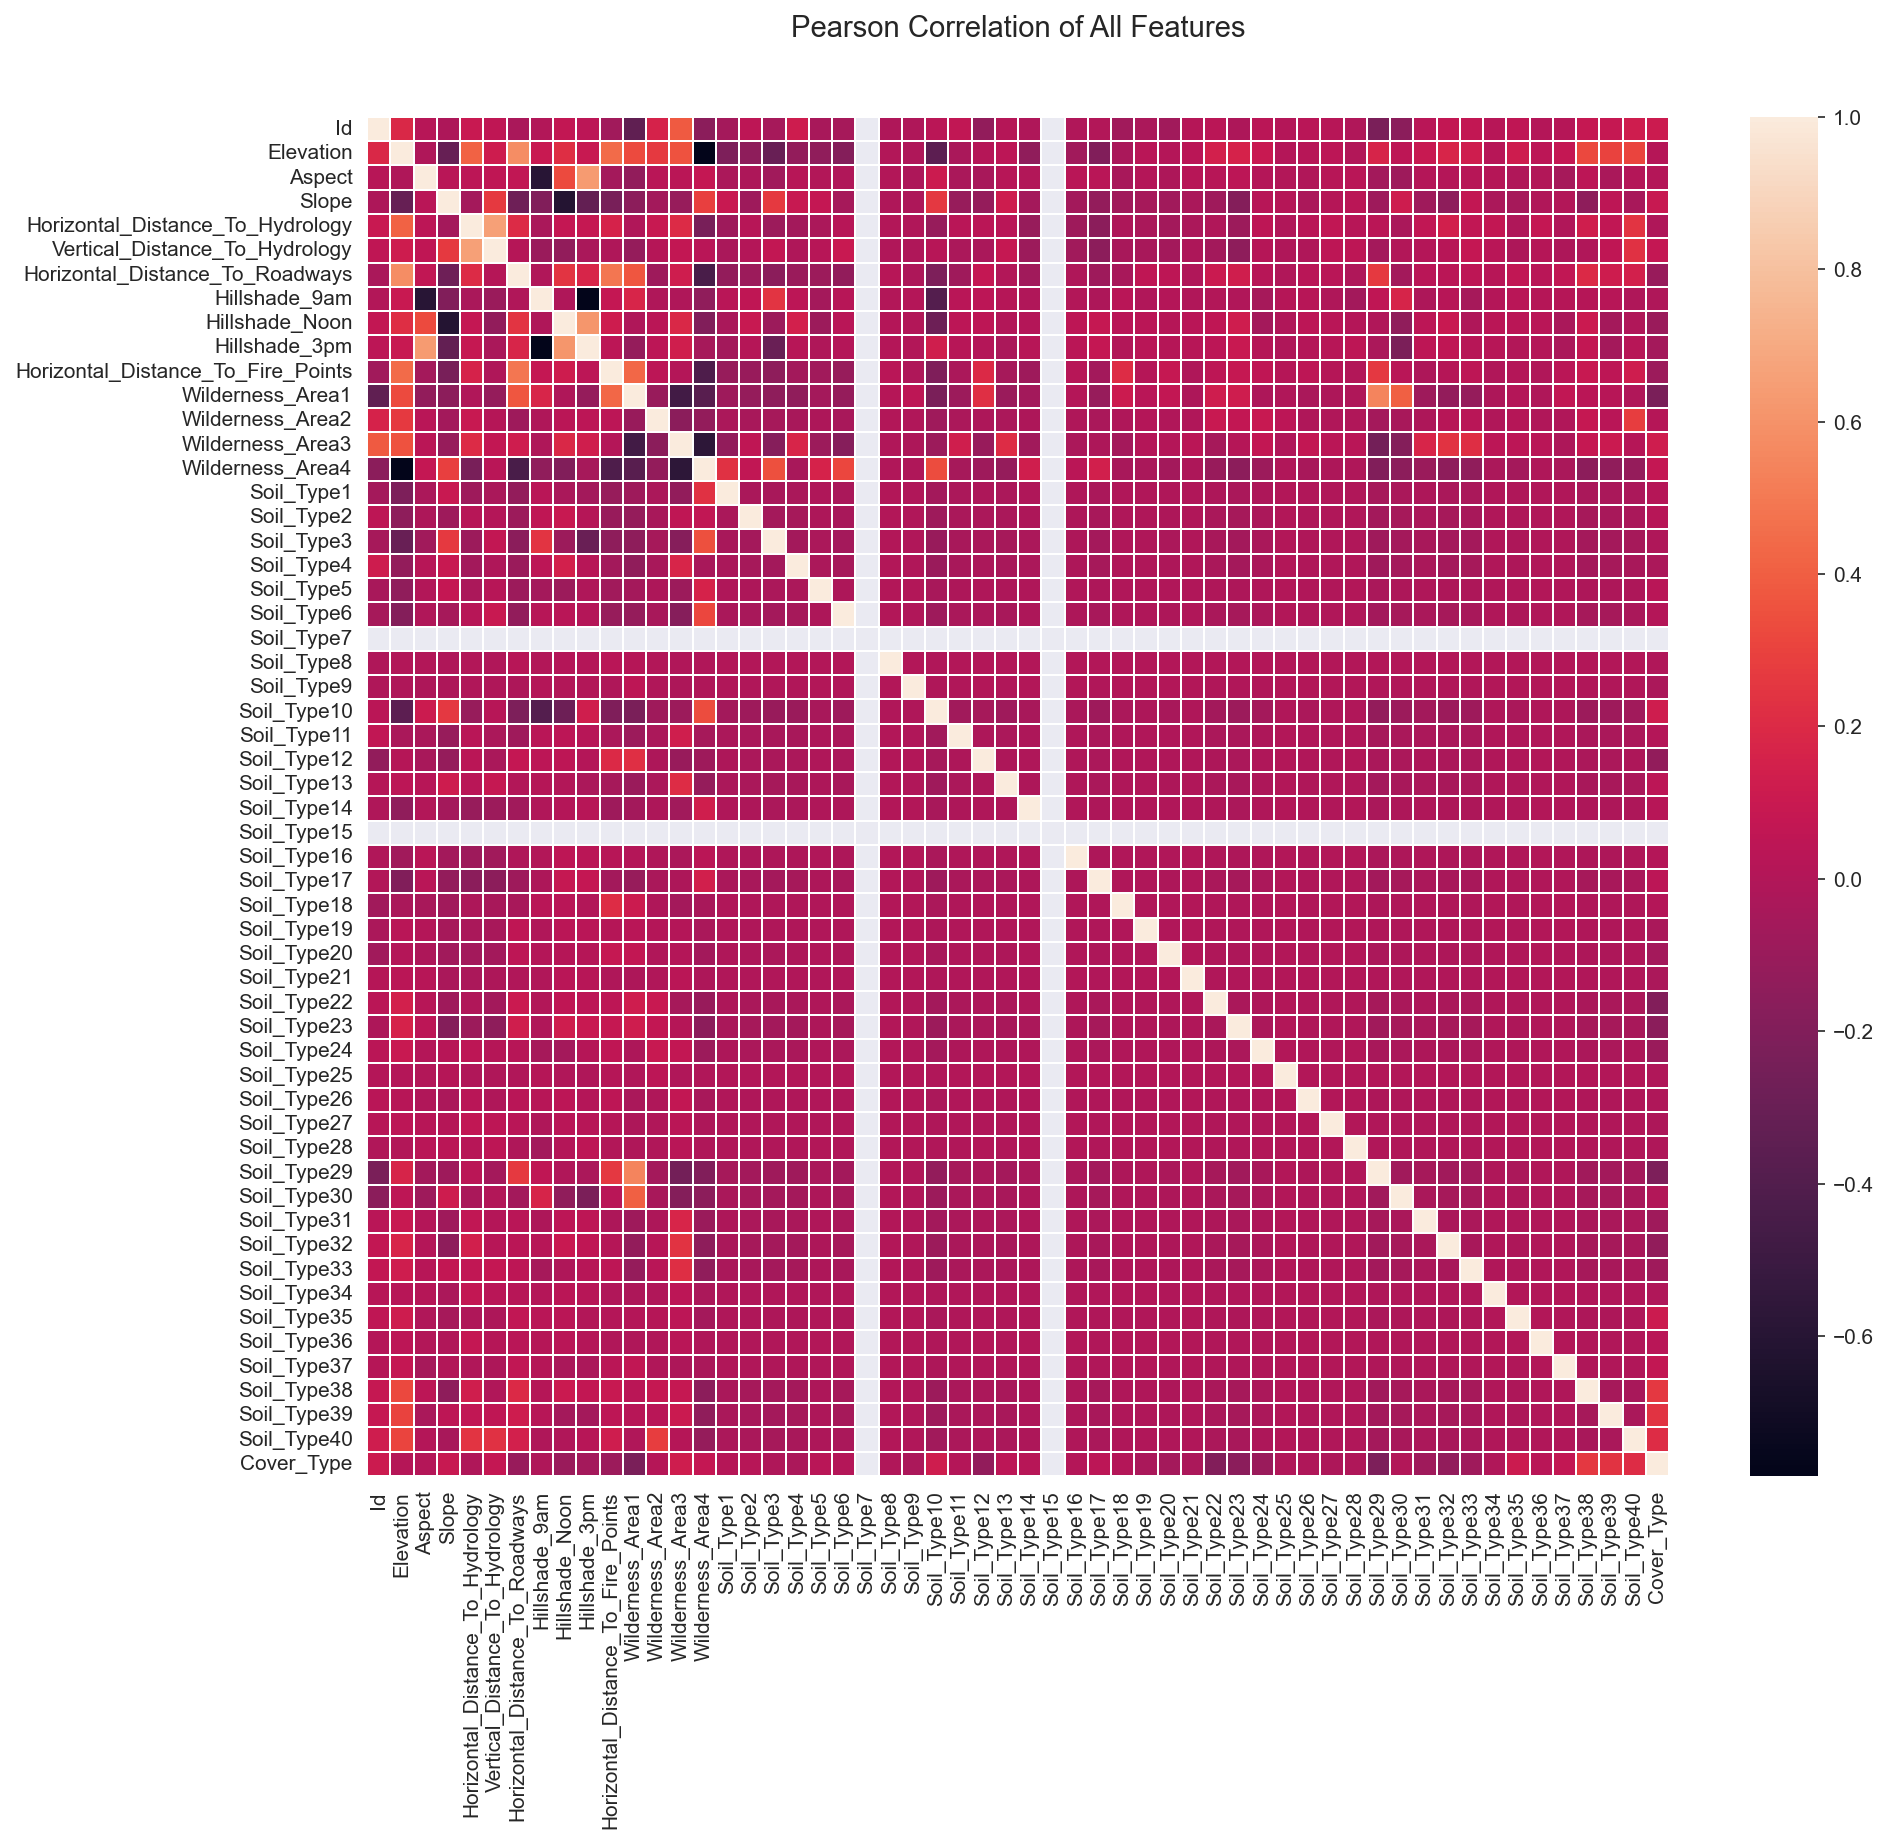

In [379]:
plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=False, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

# Soil_Type7 and Soil_Type_15 are blank so they have zero effect on Cover_Type

In [27]:
# only zeros
sum(df['Soil_Type7']), sum(df['Soil_Type15'])

(0, 0)

In [420]:
df['Soil_Type7'].nunique(), df['Soil_Type15'].nunique() # only zeros

(1, 1)

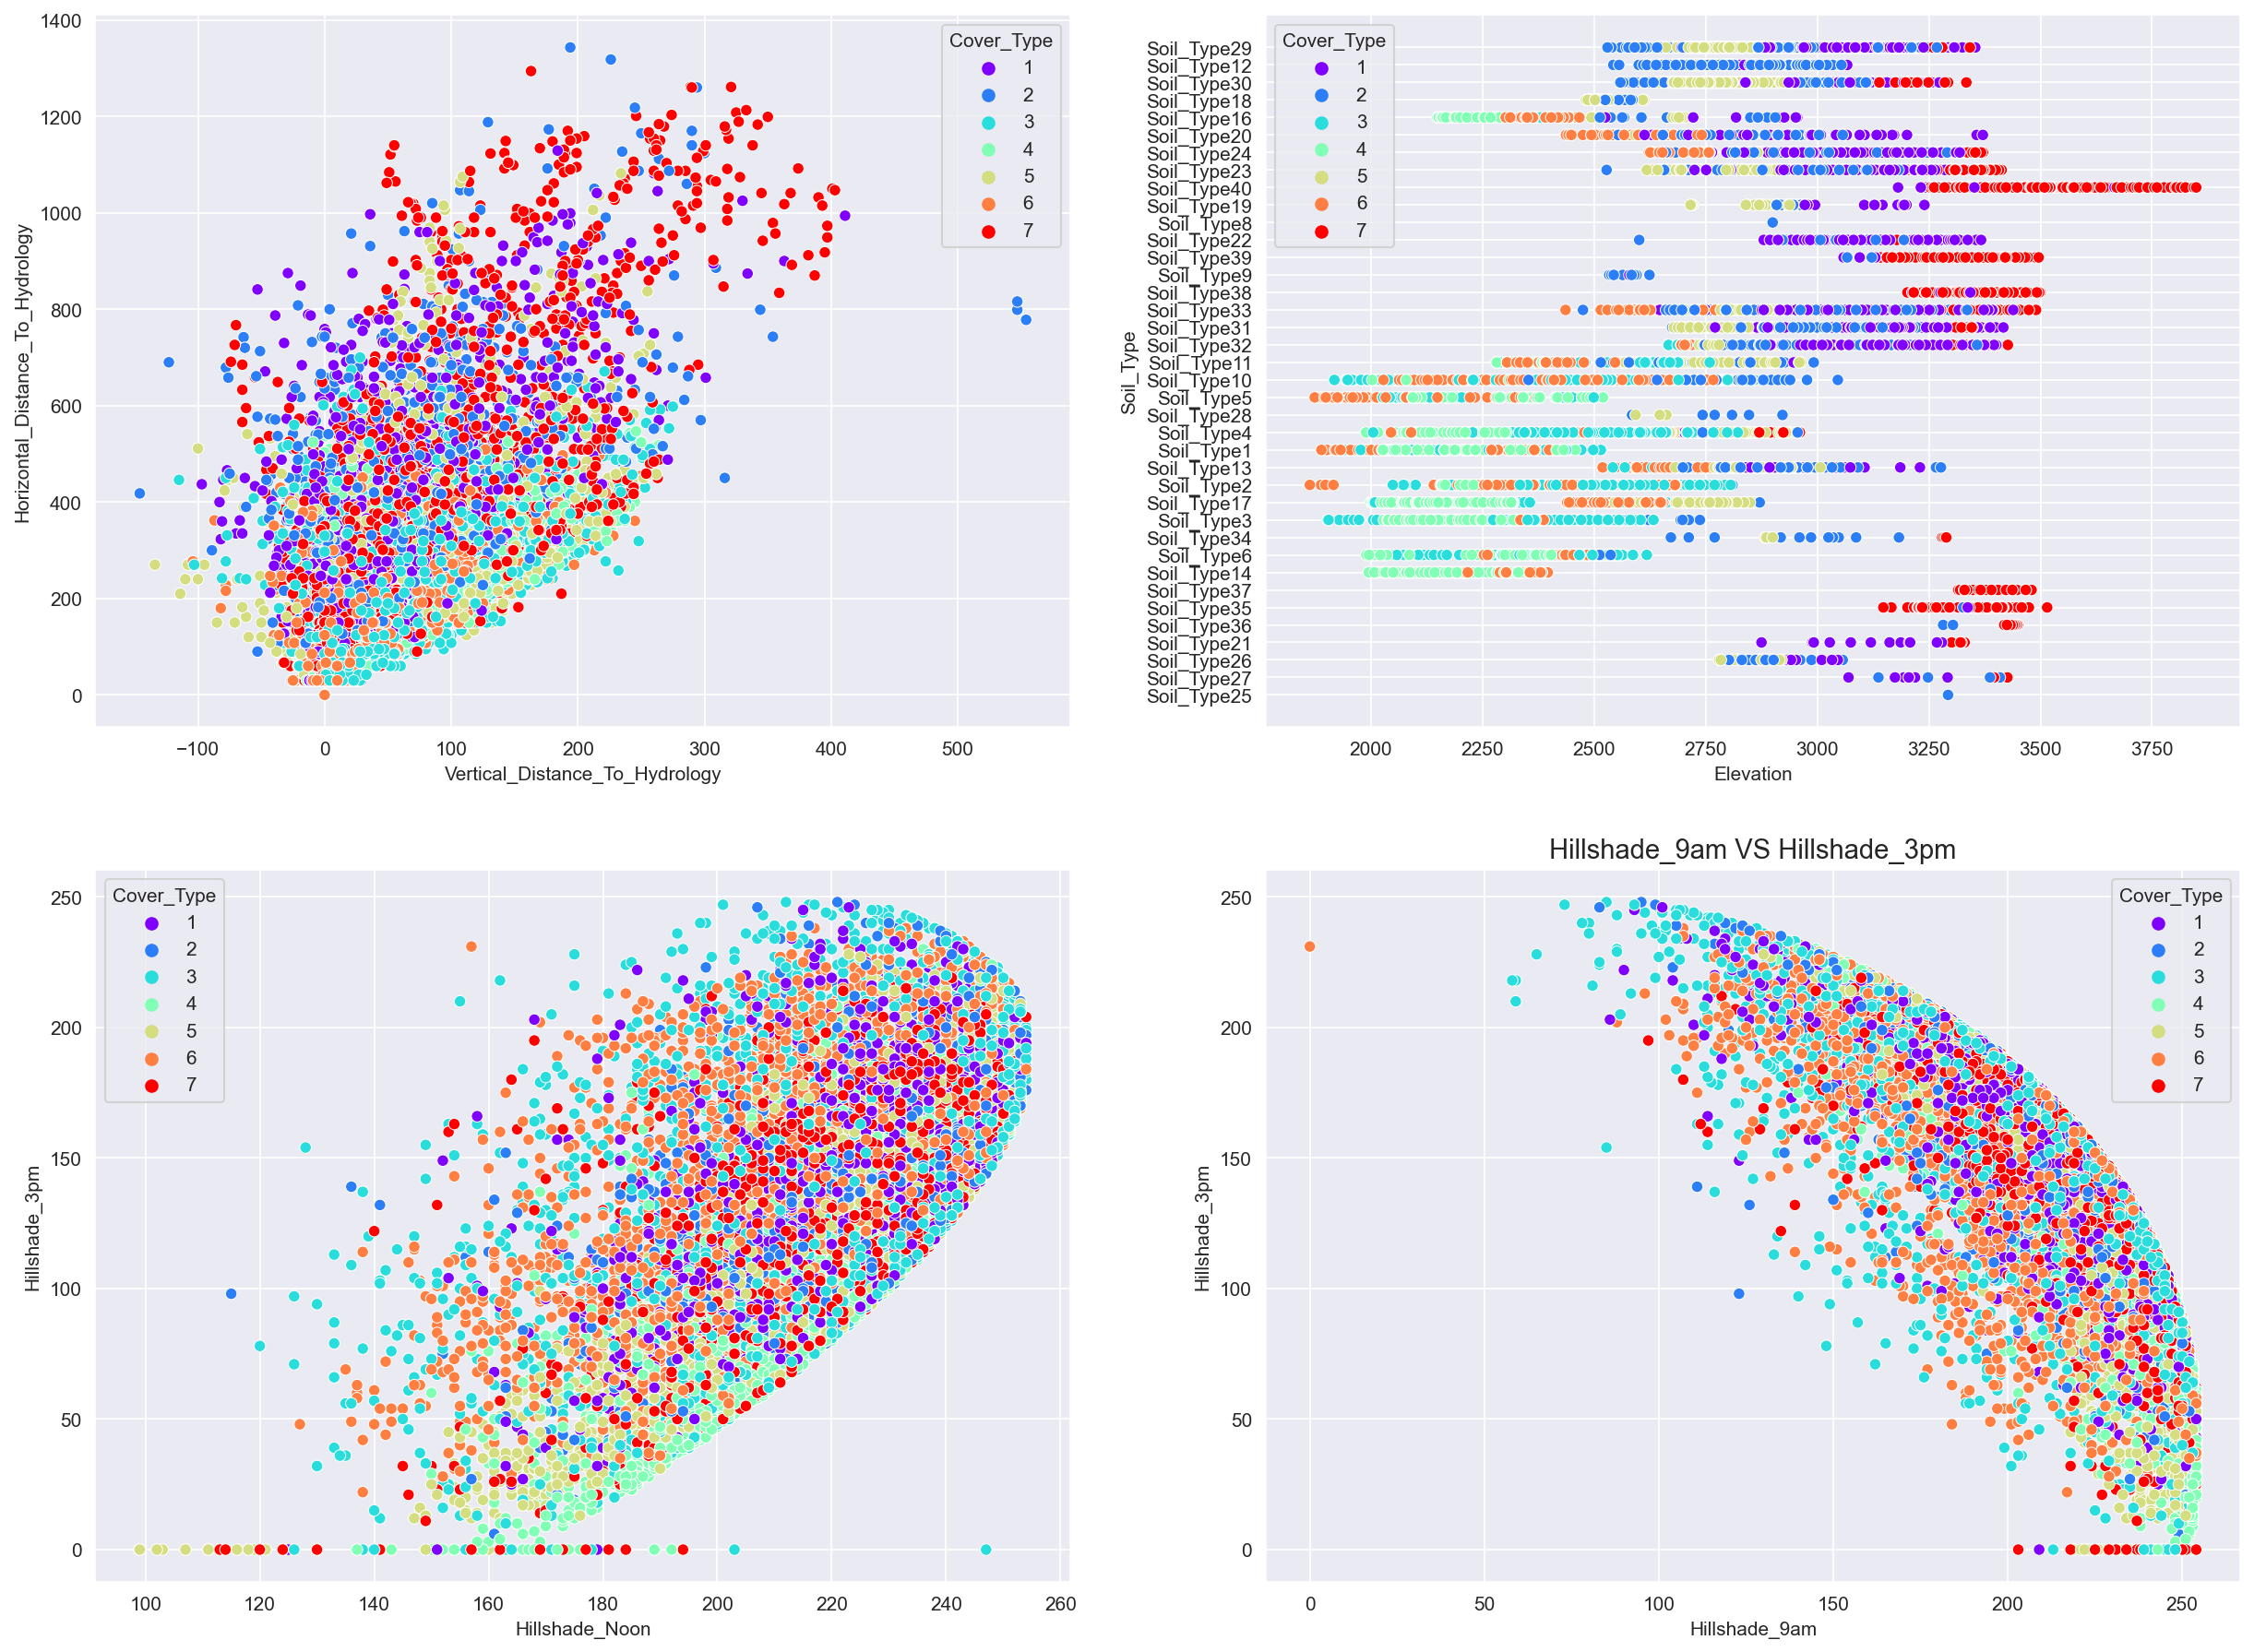

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))


sns.scatterplot(x="Vertical_Distance_To_Hydrology", y="Horizontal_Distance_To_Hydrology", 
                hue="Cover_Type", data=df_, ax=ax[0,0], palette='rainbow')
plt.title("Vertical_Distance_To_Hydrology VS Horizontal_Distance_To_Hydrology", size=14)

sns.scatterplot(x="Elevation", y="Soil_Type", 
                hue="Cover_Type", data=df_, ax=ax[0,1], palette='rainbow')
plt.title("Elevation VS Soil_Type", size=14)

sns.scatterplot(x="Hillshade_Noon", y="Hillshade_3pm", 
                hue="Cover_Type", data=df_, ax=ax[1,0], palette='rainbow')
plt.title("Hillshade_Noon VS Hillshade_3pm", size=14)

sns.scatterplot(x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_Type", data=df_, ax=ax[1,1], palette='rainbow')
plt.title("Hillshade_9am VS Hillshade_3pm", size=14)
plt.show()

# Introduction

We are going to investigate the data about forests in the Roosevelt National Forest of northern Colorado. The main goal is to answer the question
- **Is it possible to predict the type of forest cover based on other parameters?**

For this purpose we are going to explore the data using visualization methods such as histograms, bar plots, boxplots, scatter plots and kde plots. We are also going to check correlation and covariance.

There dataset covers information about seven distinct types of forest cover type for four wilderness areas in the Roosevelt National Forest of northern Colorado.

# Reading Data Set

In [31]:
df = pd.read_csv('data/train.csv')

# Preprocessing the Data

## Understanding the Data

In [32]:
df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

There are seven distinct types of forest cover type for four wilderness areas in the Roosevelt National Forest of northern Colorado:
- Spruce/Fir
- Lodgepole Pine
- Ponderosa Pine
- Cottonwood/Willow
- Aspen
- Douglas-fir
- Krummholz

**Data Fields**

- Elevation — Elevation in meters
- Aspect — Aspect in degrees azimuth
- Slope — Slope in degrees
- Horizontal_Distance_To_Hydrology — Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology — Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways — Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) — Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) — Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) — Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points — Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) — Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) — Soil Type designation
- Cover_Type (7 types, integers 1 to 7) — Forest Cover Type designation

**The wilderness areas**

- Rawah Wilderness Area
- Neota Wilderness Area
- Comanche Peak Wilderness Area
- Cache la Poudre Wilderness Area

**The soil types**

- Cathedral family - Rock outcrop complex, extremely stony.
- Vanet - Ratake families complex, very stony.
- Haploborolis - Rock outcrop complex, rubbly.
- Ratake family - Rock outcrop complex, rubbly.
- Vanet family - Rock outcrop complex complex, rubbly.
- Vanet - Wetmore families - Rock outcrop complex, stony.
- Gothic family.
- Supervisor - Limber families complex.
- Troutville family, very stony.
- Bullwark - Catamount families - Rock outcrop complex, rubbly.
- Bullwark - Catamount families - Rock land complex, rubbly.
- Legault family - Rock land complex, stony.
- Catamount family - Rock land - Bullwark family complex, rubbly.
- Pachic Argiborolis - Aquolis complex.
- unspecified in the USFS Soil and ELU Survey.
- Cryaquolis - Cryoborolis complex.
- Gateview family - Cryaquolis complex.
- Rogert family, very stony.
- Typic Cryaquolis - Borohemists complex.
- Typic Cryaquepts - Typic Cryaquolls complex.
- Typic Cryaquolls - Leighcan family, till substratum complex.
- Leighcan family, till substratum, extremely bouldery.
- Leighcan family, till substratum - Typic Cryaquolls complex.
- Leighcan family, extremely stony.
- Leighcan family, warm, extremely stony.
- Granile - Catamount families complex, very stony.
- Leighcan family, warm - Rock outcrop complex, extremely stony.
- Leighcan family - Rock outcrop complex, extremely stony.
- Como - Legault families complex, extremely stony.
- Como family - Rock land - Legault family complex, extremely stony.
- Leighcan - Catamount families complex, extremely stony.
- Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- Cryorthents - Rock land complex, extremely stony.
- Cryumbrepts - Rock outcrop - Cryaquepts complex.
- Bross family - Rock land - Cryumbrepts complex, extremely stony.
- Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- Leighcan - Moran families - Cryaquolls complex, extremely stony.
- Moran family - Cryorthents - Leighcan family complex, extremely stony.
- Moran family - Cryorthents - Rock land complex, extremely stony.

In [33]:
df['Wilderness_Area_Type'] = (df.iloc[:, 11:15] == 1).idxmax(1)
df['Soil_Type'] = (df.iloc[:, 15:-1] == 1).idxmax(1)
df_ = (df
      .drop([i for i in df.columns[11:55]], axis=1)
      .drop(['Id'], axis=1)
       )
df_['Wilderness_Area_Type'] = df['Wilderness_Area_Type'].apply(lambda x: int(x[-1]))
df_['Soil_Type'] = df['Soil_Type'].apply(lambda x: int(x[-1]) if (len(x)==10) else int(x[-2:]))

# Modelling and Performance evaluation

First, we predict the variable *Cover_Type* based on all of the other variables. For predictions we are going to use the following classifiers:
- Decision Tree Classifier,
- Random Forest Classifier,
- Gradient Boosting Classifier.

In [34]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Cover_Type                          15120 non-null  int64
 11  Wilderness_Area_Type                15120 non-null  int64
 12  Soil

In [35]:
X = df_.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12]] # all variables (but 'Cover_Type') are predictors
y = df_['Cover_Type']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

## Decision Tree Classifier

In [36]:
#Modeling (Classification)
algo = DecisionTreeClassifier(criterion='entropy', max_depth=10) # other possible criterion: 'gini' (Gini impurity)
model = algo.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)

#Report
print(classification_report(y_test, preds))

#Cross validation score
print(cross_val_score(model, X, y, cv=3))

              precision    recall  f1-score   support

           1       0.74      0.63      0.68       689
           2       0.58      0.56      0.57       601
           3       0.70      0.70      0.70       651
           4       0.89      0.93      0.91       640
           5       0.80      0.86      0.83       674
           6       0.71      0.69      0.70       666
           7       0.89      0.95      0.92       615

    accuracy                           0.76      4536
   macro avg       0.76      0.76      0.76      4536
weighted avg       0.76      0.76      0.76      4536

[0.69186508 0.68373016 0.71646825]


The best results are given for *entropy* criterion.

## Random Forest Classifier

In [37]:
#Modeling (Classification)
algo = RandomForestClassifier(criterion='entropy', max_depth=10)
model = algo.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)

#Report
print(classification_report(y_test, preds))

#Cross validation score
print(cross_val_score(model, X, y, cv=3))

              precision    recall  f1-score   support

           1       0.80      0.71      0.75       689
           2       0.74      0.65      0.69       601
           3       0.80      0.75      0.77       651
           4       0.90      0.97      0.93       640
           5       0.84      0.92      0.88       674
           6       0.77      0.80      0.78       666
           7       0.90      0.97      0.93       615

    accuracy                           0.82      4536
   macro avg       0.82      0.82      0.82      4536
weighted avg       0.82      0.82      0.82      4536

[0.75813492 0.75138889 0.77559524]


Random Forest classifier gives us better results than Decision Tree for the same value of *depth* parameter (that is to be expected).

## Gradient Boosting Classifier

In [38]:
#Modeling (Classification)
algo = GradientBoostingClassifier(max_depth=5)
model = algo.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)

#Report
print(classification_report(y_test, preds))

#Cross validation score
print(cross_val_score(model, X, y, cv=3))

              precision    recall  f1-score   support

           1       0.80      0.72      0.76       689
           2       0.72      0.67      0.69       601
           3       0.80      0.83      0.81       651
           4       0.95      0.97      0.96       640
           5       0.86      0.92      0.89       674
           6       0.81      0.80      0.81       666
           7       0.91      0.97      0.94       615

    accuracy                           0.84      4536
   macro avg       0.84      0.84      0.84      4536
weighted avg       0.84      0.84      0.84      4536

[0.76190476 0.75277778 0.76845238]


We got the best results by using the Gradient Boosting Classifier. However, it was the most time-consuming algorithm (for given parameters). 